In [1]:
import SOLVING_QKE_FUNCTION as solve
import numpy as np
import derivatives as der
import matplotlib.pyplot as plt

In [2]:
def make_ics(N, Emax):
    Eval= np.linspace(Emax/N, Emax, N)
    ym0 = np.zeros((N,4))
    for i in range(len(ym0)):
        p0 = 1/(np.exp(Eval[i])+1)
        ym0[i,:] = [p0,0,0,1]
    ym0_bar= np.zeros((N,4))
    for i in range(len(ym0_bar)):
        p0= 1/(np.exp(Eval[i])+1)
        ym0_bar[i,:]= [p0,0,0,1]
        
    return ym0, ym0_bar

In [3]:
N=200
Emax=10

In [4]:
ym0, ym0_bar = make_ics(N, Emax)
y0 = der.newarray_maker(ym0,ym0_bar)

In [5]:
%%timeit
ym0, ym0_bar = make_ics(N, Emax)

808 µs ± 2.91 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [6]:
%%timeit
y0 = der.newarray_maker(ym0,ym0_bar)

2.34 µs ± 20.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


File : DataRun/T012.npz already exists.  Abort


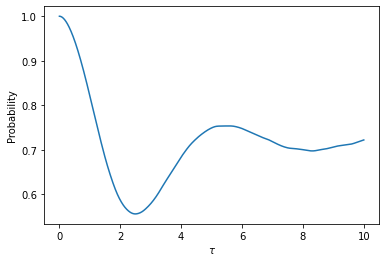

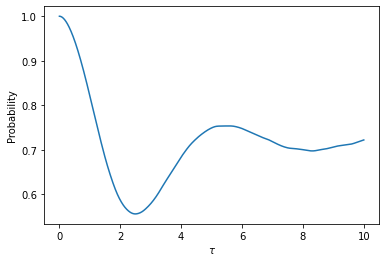

Data saved to file DataRun/T012.npz
905 time steps saved with dN = 5
incl_thermal_term True
incl_anti_neutrinos True
incl_collisions False
incl_eta False
eta_e 0
eta_mu 0
N 200
eps_max 10
delta m-squared 2.5e-15
sin^2 (2theta) 0.8
T 0.12
CPU times: user 22.5 s, sys: 91.2 ms, total: 22.6 s
Wall time: 22.6 s


In [7]:
%%time
solve.solve_QKE(0.12, y0, True, True, "DataRun", "T012", Emax=Emax, incl_collisions=False)

In [8]:
th = 0.5 * np.arcsin(solve.sin22th_default)

Eval = np.linspace(Emax/N, Emax, N)

incl_thermal_term = True
incl_anti = True
incl_collisions = False
incl_eta = False


p= np.zeros(N+9)
p[-1]= solve.dm2_atm
p[-2]= th
p[:N]= np.linspace(Emax/N, Emax, N)
p[-3]= 0.12

if incl_thermal_term:
    p[-4] = 1

if incl_anti:
    p[-5] = -1
else:
    p[-5] = 0

if incl_collisions:
    p[-6] = -1

if incl_eta:
    p[-7] = -1
    p[-8] = eta_e
    p[-9] = eta_mu
else:
    p[-7] = 0


In [9]:
d = der.f(0, y0, p)

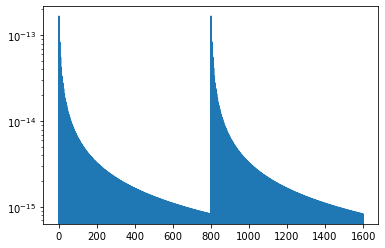

In [10]:
plt.figure()
plt.semilogy(np.abs(d))

In [11]:
%%timeit
d = der.f(0, y0, p)

306 µs ± 15.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
